# Data Analysis Interview Challenge
This is your chance to wow us with creative and rigorious solutions! Please include your code at the end of your submission, or in a separate file.
## Instructions
### Part 1 - Exploratory data analysis
The attached `logins.json` file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

### Part 2 - Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:  
   a. how you will implement the experiment  
   b. what statistical test(s) you will conduct to verify the significance of the observation  
   c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

### Part 3 - Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users whop signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were "active" (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file `ultimate_data_challenge.json`. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

#### Data description
- `city`: city this user signed up in
- `phone`: primary device for this user
- `signup_date`: date of account registration; in the form `YYYY MM DD`
- `last_trip_date`: the last time this user completed a trip; in the form `YYYY MM DD`
- `avg_dist`: the average distance in miles per trip taken in the first 30 days after signup
- `avg_rating_by_driver`: the rider’s average rating over all of their trips
- `avg_rating_of_driver`: the rider’s average rating of their drivers over all of their trips
- `surge_pct`: the percent of trips taken with surge multiplier > 1
- `avg_surge`: The average surge multiplier over all of this user’s trips
- `trips_in_first_30_days`: the number of trips this user took in the first 30 days after signing up
- `ultimate_black_user`: `TRUE` if the user took an Ultimate Black in their first 30 days; `FALSE` otherwise
- `weekday_pct`: the percent of the user’s trips occurring during a weekday

## Answers
### Part 1 - Exploratory data analysis
We'll first start by loading the data by itself and see what we can gather from it.

In [374]:
import json
import pandas as pd
from datetime import datetime

logins_df = pd.read_json("logins.json").set_index('login_time')
logins_df

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21
...
1970-04-13 18:50:19
1970-04-13 18:43:56
1970-04-13 18:54:02


It's a bit difficult to make much from this since the times aren't in order. Let's organize it then.

In [375]:
logins_df = logins_df.sort_values(by=['login_time'], ascending=True)
logins_df

""
login_time
1970-01-01 20:12:16
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:36
1970-01-01 20:16:37
...
1970-04-13 18:48:52
1970-04-13 18:50:19
1970-04-13 18:54:02


Now that the data is organized, we can see that we have a time series of login times starting from the evening of January 1, 1970 to the evening of April 13, 1970. The time is written in the following format:
`year-month-day hour:minute:second`.

Let's see what else we can gather before we start manipulating the data.

In [376]:
logins_df.columns

Index([], dtype='object')

It was probably obvious from earlier, but we are only dealing with one column: the login times. Our next step is to aggregate the logins on 15-minute time intervals.

In [377]:
logins_df.insert(0, 'hits', 1)
logins_agg = logins_df.resample("15min", how="sum")
logins_agg

C:\Users\Agui\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


,hits
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


This new `hits` column is the number of logins during a 15-minute interval. Before we move on, let's see what are the most popular login intervals.

In [378]:
logins_agg.sort_values(by=['hits'], ascending=False)

,hits
login_time,
1970-03-01 04:30:00,73
1970-04-04 05:30:00,66
1970-04-04 01:30:00,64
1970-04-04 01:15:00,63
1970-04-01 23:30:00,60
...,...
1970-01-11 09:45:00,0
1970-02-16 08:15:00,0
1970-01-27 08:30:00,0


The most popular time interval in this data set is 4:30-4:45 AM on March 1 with 73 hits. That said, second, third, and fourth are all from April 4, making that a popular day overall. There are several time intervals with 0 hits, however. Let's see how many there are.

In [379]:
len(logins_agg[(logins_agg.hits == 0)])

407

There are 407 time intervals with no hits. This is a bit odd as that is a rather large number of intervals with just nothing in them.
There could be a variety of reasons why there are so many:
- The system was done at these times, so no one could get on
- These times just weren't active, so no one was actually using the system
- There is some data missing due to lack of reporting, corruption, etc.

Since we don't know the reason why there are no hits during these times as well as the fact that this is a time series, we should probably keep the data as is for now at least.

Now should be a good time to start graphing the time series. Due to how long the time series is, we will first divide and plot the series by month.

In [380]:
monthly_logins = [group[1] for group in logins_agg.groupby(logins_agg.index.month)]

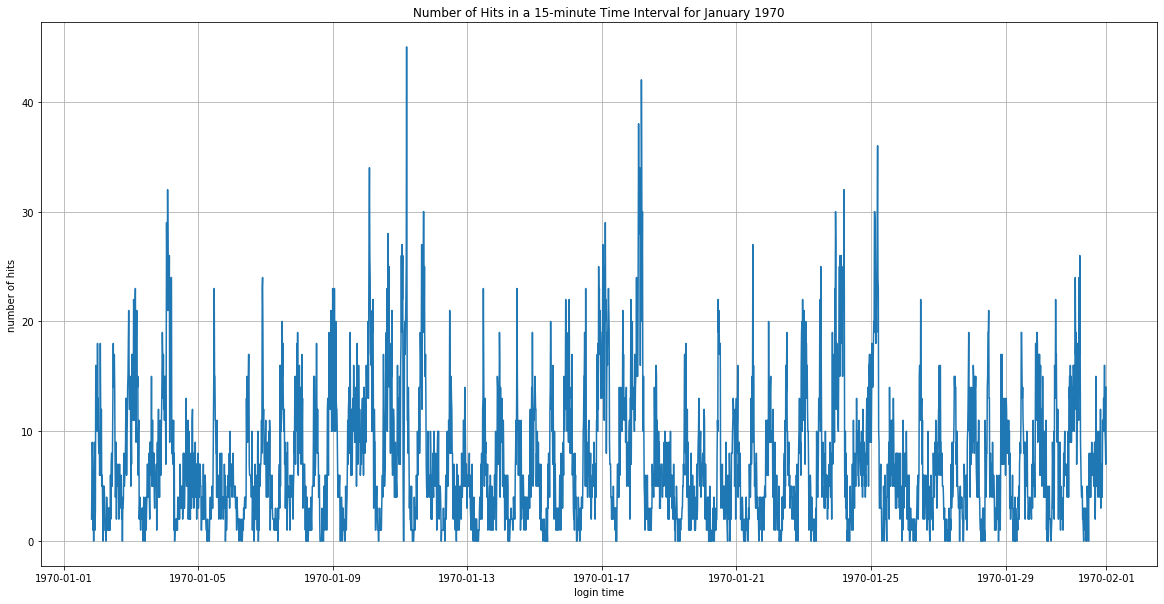

In [381]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = [20, 10]

plt.plot(monthly_logins[0])
plt.grid(b=True, which='both')
plt.xlabel('login time')
plt.ylabel('number of hits')
plt.title('Number of Hits in a 15-minute Time Interval for January 1970')

plt.show()

In [382]:
monthly_logins[0].sort_values(by=['hits'], ascending=False).head(50)

,hits
login_time,
1970-01-11 04:45:00,45
1970-01-18 04:15:00,42
1970-01-18 02:15:00,38
1970-01-25 04:45:00,36
1970-01-18 04:30:00,34
1970-01-10 02:15:00,34
1970-01-18 03:00:00,34
1970-01-18 03:15:00,33
1970-01-24 04:45:00,32


It seems that the most popular login times for the month of January are in the middle of the month at late night / early morning.

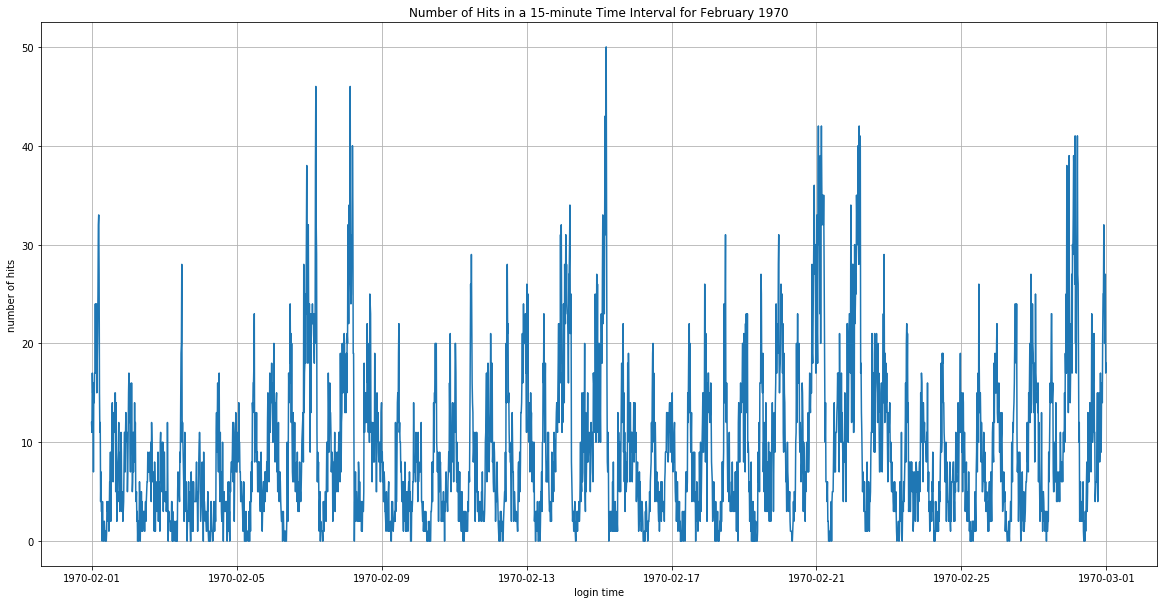

In [383]:
plt.plot(monthly_logins[1])
plt.grid(b=True, which='both')
plt.xlabel('login time')
plt.ylabel('number of hits')
plt.title('Number of Hits in a 15-minute Time Interval for February 1970')

plt.show()

In [384]:
monthly_logins[1].sort_values(by=['hits'], ascending=False).head(50)

,hits
login_time,
1970-02-15 04:45:00,50
1970-02-08 03:15:00,46
1970-02-07 04:30:00,46
1970-02-15 04:00:00,43
1970-02-22 04:15:00,42
1970-02-21 01:15:00,42
1970-02-21 03:15:00,42
1970-02-22 04:45:00,41
1970-02-28 03:15:00,41


Yet again, the most popular hours for logging in are late at night / early morning. The dates are more spread out in this month compared to January, but there is still a bit of a spike in the middle of the month. Oddly enough, there seem to be more logins in general in the month of February compared to January.

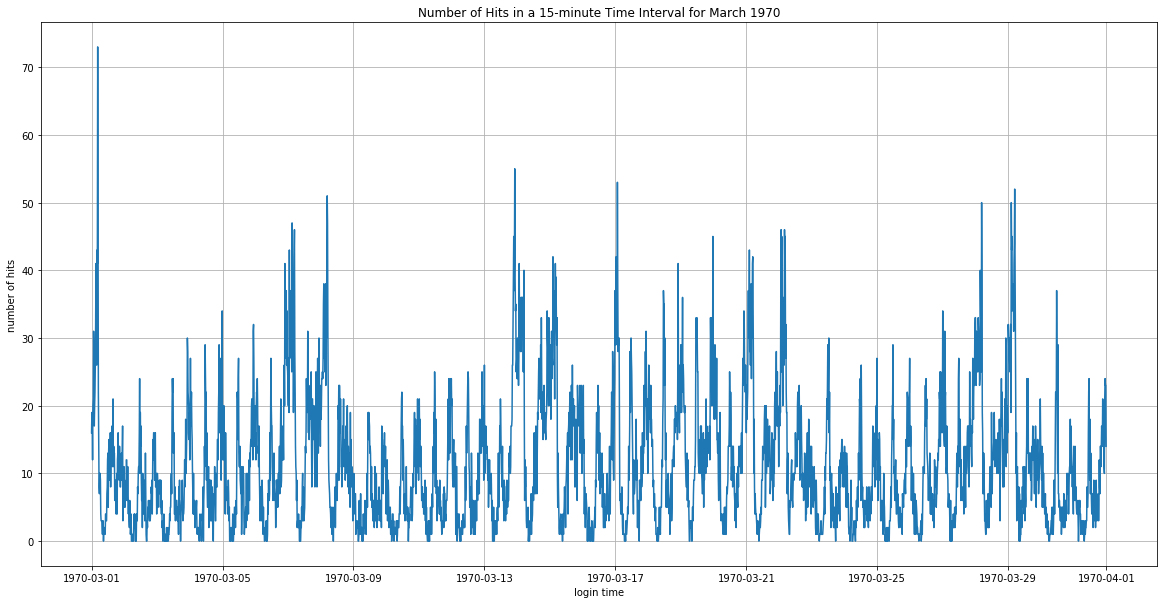

In [385]:
plt.plot(monthly_logins[2])
plt.grid(b=True, which='both')
plt.xlabel('login time')
plt.ylabel('number of hits')
plt.title('Number of Hits in a 15-minute Time Interval for March 1970')

plt.show()

In [386]:
monthly_logins[2].sort_values(by=['hits'], ascending=False).head(50)

,hits
login_time,
1970-03-01 04:30:00,73
1970-03-13 22:15:00,55
1970-03-17 01:30:00,53
1970-03-29 04:45:00,52
1970-03-08 04:45:00,51
1970-03-28 04:30:00,50
1970-03-29 02:15:00,50
1970-03-01 04:45:00,48
1970-03-08 05:00:00,47


Yet again, late at night / early in the morning is popular for loging in. The dates for the most logins continues to spread out (the most amount of logins in a single interval takes place on March 1), and the number of logins continues to grow.

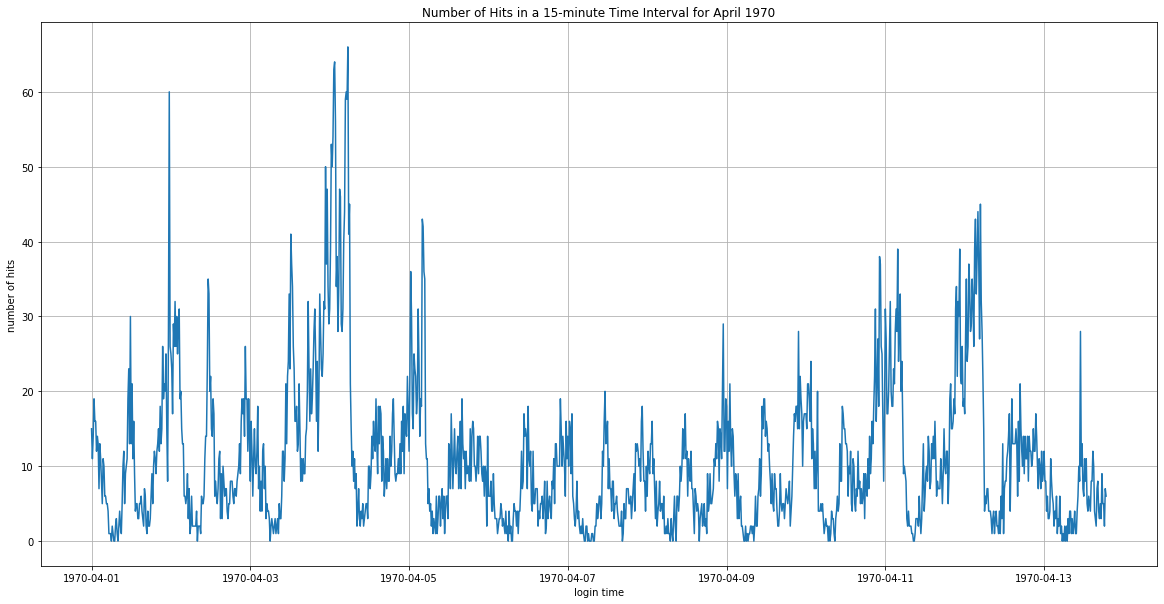

In [387]:
plt.plot(monthly_logins[3])
plt.grid(b=True, which='both')
plt.xlabel('login time')
plt.ylabel('number of hits')
plt.title('Number of Hits in a 15-minute Time Interval for April 1970')

plt.show()

In [388]:
monthly_logins[3].sort_values(by=['hits'], ascending=False).head(50)

,hits
login_time,
1970-04-04 05:30:00,66
1970-04-04 01:30:00,64
1970-04-04 01:15:00,63
1970-04-01 23:30:00,60
1970-04-04 05:00:00,60
1970-04-04 04:45:00,59
1970-04-04 05:15:00,59
1970-04-04 01:45:00,56
1970-04-04 01:00:00,54


April has less days for data compared to the other three months, so it's harder to give a good analysis for this month. That said, April 4 is a very popular day to log in on, as much of the top 50 for this month is dedicated to it. After this, the number of logins seems to decrease. We should use some linear regression to see how this looks as a whole.

In [389]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(logins_agg, logins_agg["hits"])
model_result = "Intercept: {}, Slope: {}"
print(model_result.format(model.intercept_, model.coef_))

Intercept: -1.7763568394002505e-15, Slope: [1.]


With a slope of 1, this means that the number of logins is steadily increasing over time throughout the series as a whole. We could check to see this operates on a month-by-month basis.

In [390]:
# January
model.fit(monthly_logins[0], monthly_logins[0]["hits"])
model_result = "Intercept: {}, Slope: {}"
print(model_result.format(model.intercept_, model.coef_))

Intercept: -5.329070518200751e-15, Slope: [1.]


In [391]:
# February
model.fit(monthly_logins[1], monthly_logins[1]["hits"])
model_result = "Intercept: {}, Slope: {}"
print(model_result.format(model.intercept_, model.coef_))

Intercept: 3.552713678800501e-15, Slope: [1.]


In [392]:
# March
model.fit(monthly_logins[2], monthly_logins[2]["hits"])
model_result = "Intercept: {}, Slope: {}"
print(model_result.format(model.intercept_, model.coef_))

Intercept: 1.0658141036401503e-14, Slope: [1.]


In [393]:
# April
model.fit(monthly_logins[3], monthly_logins[3]["hits"])
model_result = "Intercept: {}, Slope: {}"
print(model_result.format(model.intercept_, model.coef_))

Intercept: -1.7763568394002505e-15, Slope: [1.]


The slopes are all the same, meaning that the number of logins grows at a constant rate, steadily increasing by the month.

### Part 2 - Experiment and metrics design
1. I would choose the number of driver partners active at both day and night and in both cities as the key measure of success in this experiment. The goal of the experiment is to encourage driver partners in both cities, but the cities are active at different times of the day during the work week. In particular, I would look at the dawn and dusk drivers, as those are the ones most likely to travel between cities due to one city's workers going home while the other's are going to work.
2. I would design an experiment that would keep track of the number of driver partners that use the toll bridge throughout the day. I would keep track of the time and which direction the drivers were going. I would run some regression using daily intervals to see if the bridge is getting used. If the slope is positive, then the bridge is getting used more frequently, which means more people are traveling between the cities. If the slope is 0 or negative, then the cities need to try something else to encourage more partners. Then I would run some clustering to see if the number of drivers traveling from one city to the other is equal to the number going the other direction. If the clusters are about equal, then the experiment is a success for both cities; if not, then one city would need to look into measures to get more people to visit.

### Part 3 - Predictive modeling

In [394]:
openfile = open("ultimate_data_challenge.json")
jsondata = json.load(openfile)
ultimate_df = pd.DataFrame(jsondata)
openfile.close()
ultimate_df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [395]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


These two snippets of code show us that there is a lot of information contained in the data. We're given the city of the rider, how many trips the rider took in the first 30 days of signing up, their sign-up date, the average rating they gave to all drivers, the average surge multiplier of all their trips, the date of their last trip, what kind of phone they use, the percentage of trips where the surge multiplier was 1 or greater, whether or not they're a Ultimate Black user, the average distance per trip taken, and the average rating of the rider for all trips. There are a few `NaN` values in the average rating of driver category. We should see how many there are.

In [396]:
ultimate_df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

The `avg_rating_of_driver` has a lot of `NaN` values (8122 to be precise). There is also a good amount of `NaN`s in both `phone` and `avg_rating_by_driver`. Knowing what kind of phone the driver is using probably won't help us too much, so we can probably just say they're "missing" and not worry too much about them.

In [397]:
ultimate_df['phone'] = ultimate_df['phone'].fillna('missing')

In [398]:
ultimate_df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                        0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

We have taken care of the `NaN`s for `phone`. What to do with the ratings will be a little trickier. An easy assumption to make is that ratings will have an effect on whether a user is retained or not; higher ratings can result in an increased likelihood that the user comes back. We don't want these `NaN`s to skew the data one way or another, so we will drop them in this case.

In [399]:
ult_no_nan_df = ultimate_df.dropna()
ult_no_nan_df.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

Our data is now cleaned of all `NaN`s. Let's see how much is left after that.

In [400]:
ult_no_nan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 12 columns):
city                      41744 non-null object
trips_in_first_30_days    41744 non-null int64
signup_date               41744 non-null object
avg_rating_of_driver      41744 non-null float64
avg_surge                 41744 non-null float64
last_trip_date            41744 non-null object
phone                     41744 non-null object
surge_pct                 41744 non-null float64
ultimate_black_user       41744 non-null bool
weekday_pct               41744 non-null float64
avg_dist                  41744 non-null float64
avg_rating_by_driver      41744 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.9+ MB


We lost quite a few entries as a result of this, but we will hopefully get some better results for our analysis.

Before we can do any analysis on retaining a user, we need to figure out which users are retained in the first place. A user is considered retained if they took a trip in the preceding 30 days, which means they took a trip in the last month of recorded data. Let's first find out what this last recorded month is.

In [401]:
ult_no_nan_df.sort_values(by=['last_trip_date'], ascending=False).head(100)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
3204,King's Landing,6,2014-01-26,4.9,1.12,2014-07-01,Android,17.9,True,85.9,15.22,4.8
41913,King's Landing,6,2014-01-07,4.7,1.12,2014-07-01,iPhone,17.4,False,52.2,2.84,4.6
1134,Winterfell,17,2014-01-25,5.0,1.08,2014-07-01,iPhone,14.3,False,75.3,2.21,4.5
46690,Winterfell,1,2014-01-27,5.0,1.14,2014-07-01,iPhone,18.2,False,36.4,1.68,4.8
31313,Winterfell,2,2014-01-12,4.3,1.00,2014-07-01,iPhone,0.0,False,33.3,9.37,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...
9999,King's Landing,1,2014-01-23,5.0,1.00,2014-07-01,iPhone,0.0,False,100.0,1.15,5.0
45154,King's Landing,1,2014-01-19,5.0,1.00,2014-07-01,Android,0.0,True,60.0,8.14,5.0
41988,Winterfell,8,2014-01-25,4.1,1.01,2014-07-01,Android,4.8,False,57.1,2.34,4.6
29022,Winterfell,10,2014-01-30,4.5,1.00,2014-07-01,iPhone,0.0,True,68.0,3.65,4.3


The last furthest date recorded in `last_trip_date` is `2014-07-01`; therefore, we will consider a user retained if `last_trip_date` is in June or July.

In [402]:
import re

retained = []

for index, row in ult_no_nan_df.iterrows():
    if re.search("2014-06-\d{2}", row['last_trip_date']) or re.search("2014-07-\d{2}", row['last_trip_date']):
        retained.append(True)
    else:
        retained.append(False)

ult_no_nan_df['retained'] = retained
ult_no_nan_df

C:\Users\Agui\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7,True
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5,False
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,True
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,False


In [403]:
ult_no_nan_df['retained'].value_counts()

False    24586
True     17158
Name: retained, dtype: int64

41% of the users in this set are retained. Ultimate's retention is decent.

Now that we know which users are retained and which aren't, we can finally do a prediction. We will perform a logistic regression to figure out what makes a user retained or not. Logistic regression is a good model to use in this situation since we're using other variables to predict a binary outcome: whether a user is retained or not. Other options for binary classification include decision trees and support vector machines, but I chose logistic regression since it tells you which variables would help and by how much.

We need to convert `phone` to a dummy variable so that the column can be used in the analysis. Since all `signup_date` values are in January and we used `last_trip_date` to calculate `retained`, we will also drop them as well.

In [404]:
phone = pd.get_dummies(ult_no_nan_df['phone'], drop_first=True)
ult_no_nan_df = pd.concat([ult_no_nan_df, phone], axis=1)

ult_no_nan_df = ult_no_nan_df.drop(columns=['phone', 'signup_date', 'last_trip_date'])

ult_no_nan_df

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,iPhone,missing
0,King's Landing,4,4.7,1.10,15.4,True,46.2,3.67,5.0,True,1,0
1,Astapor,0,5.0,1.00,0.0,False,50.0,8.26,5.0,False,0,0
2,Astapor,3,4.3,1.00,0.0,False,100.0,0.77,5.0,False,1,0
3,King's Landing,9,4.6,1.14,20.0,True,80.0,2.36,4.9,True,1,0
4,Winterfell,14,4.4,1.19,11.8,False,82.4,3.13,4.9,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,4.8,1.11,11.1,True,55.6,2.53,4.7,True,1,0
49994,Astapor,1,4.6,1.44,37.5,False,25.0,2.25,4.5,False,1,0
49995,King's Landing,0,5.0,1.00,0.0,False,100.0,5.63,4.2,True,1,0
49997,Winterfell,0,5.0,1.00,0.0,True,100.0,3.86,5.0,False,0,0


In [405]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

ind_cols = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'iPhone', 'missing']
x_train, x_test, y_train, y_test = train_test_split(ult_no_nan_df[ind_cols], ult_no_nan_df['retained'], test_size=0.3)

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
predictions = logmodel.predict(x_test)

C:\Users\Agui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [406]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.69      0.81      0.75      7371
        True       0.64      0.49      0.55      5153

    accuracy                           0.68     12524
   macro avg       0.67      0.65      0.65     12524
weighted avg       0.67      0.68      0.67     12524



In [407]:
print(logmodel.coef_)
print(logmodel.intercept_)

[[ 1.04301150e-01 -5.25863699e-03 -5.10343638e-01  7.15968153e-03
   8.28691612e-01  5.18241621e-04 -2.93109013e-02 -1.25124124e-01
   1.09349576e+00  5.64291034e-01]]
[-0.53548887]


Our model is mediocre in this case. Our precision is only slightly above average, and, while the `False` recall is pretty good, the `True` recall is much less so.

The following variables have a positive correlation with retention: `trips_in_first_30_days`, `avg_rating_of_driver`, `surge_pct`, `ultimate_black_user`, `weekday_pct`, `iPhone`, and `missing`. This leaves `avg_surge`, `avg_rating_by_driver`, and `avg_dist` as the only variables with a negative correlation with retention. If Ultimate wants to increase retention, they should seek to maximize the variables with a positive correlation (especially `ultimate_black_user` as it had the highest correlation) and minimize those with negative correlations.